<a href="https://colab.research.google.com/github/ryanjerome22/-Internship-AI-Technical-Task-Sentiment-Analysis/blob/main/%5BInternship%5D_AI_Technical_Task_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:30px">[Internship] AI Technical Task- Sentiment Analysis</h1>

#**Objectives**

> ● This is to test each candidate’s unique problem solving skills which applies to the day-to-day tasks of an AI Engineer in Sprout AI Labs (SAIL)

> ● By doing the demo, this tests how well they can present their work with stakeholders whether in tech and non-tech.





#**Introduction**

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:20px">Problem Statement</h1>
<li>Develop a sentiment analysis model in Python to automatically determine the general sentiment expressed in a given query. The model should be capable of discerning the sentiment of customers towards a product or a situation, providing valuable insights into user experiences.

<h1 class="alert alert-block alert-info" style="text-align:center; font-size:20px">Model Used</h1>

<li> Logistic regression is a commonly used model in sentiment analysis for several reasons, but it's essential to note that the choice of the best model depends on various factors, including the nature of the data, the size of the dataset, and the specific requirements of the sentiment analysis task.

<li>  Logistic regression is particularly suitable when dealing with smaller datasets, offering lower risk of overfitting. It performs well with linearly separable data and provides probabilistic outputs, offering insights into the likelihood of sentiment classes.

<li> Additionally, logistic regression allows for the examination of feature importance, making it a practical choice for scenarios where a simpler model is preferred. While other models, such as support vector machines and neural networks, have their merits, logistic regression's balance of interpretability and performance makes it a compelling choice for sentiment analysis tasks.







# **Install and Import Packages**

In [1]:
#Connecting Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#For basic table operation,  work with arrays
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Installation
!pip install nltk
!pip install language_tool_python


#Added imports for data cleaning
import re
import string
import gc
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('wordnet')
import language_tool_python
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#To split data into train and test
from sklearn.model_selection import train_test_split

#For evaluation of model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **Loading Data**

In [3]:
# Read the Dataframe from the Google drive
path = "/content/drive/MyDrive/[Internship] AI Technical Task/sentiment_test_cases.csv"

# Display the DataFrame using Panda
df= pd.read_csv(path)
df.head()

,expected_sentiment,text
0,positive,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,positive,Reading my kindle2... Love it... Lee childs i...
2,positive,"Ok, first assesment of the #kindle2 ...it fuck..."
3,positive,@kenburbary You'll love your Kindle2. I've had...
4,positive,@mikefish Fair enough. But i have the Kindle2...


In [6]:
# Print the Shape of the DataFrame
print("Shape of data=>",df.shape)

Shape of data=> (498, 2)


In [7]:
# Find out if there is a null value to the DataFrame
df.isnull().sum()

expected_sentiment    0
text                  0
dtype: int64

In [8]:
# Information of the Datafram including its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   expected_sentiment  498 non-null    object
 1   text                498 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


# **Data Preprocessing**

<li>Preprocessing refers to the steps taken to clean and transform raw text data. The primary goal of preprocessing is to enhance the quality of the data and to extract relevant features that can be used by the model to accurately determine sentiment.

In [10]:
#Function to count the vocabulary of the dataset
def create_vocabulary(data):
    vocab = []
    for captions in data.values:
        vocab.extend(captions.split())
    print("Vocabulary Size : {}".format(len(set(vocab))))
    return vocab

In [11]:
df["text"].isnull().sum()

0

In [12]:
print ('Unique Length: ' + str(df['text'].unique().shape[0]))

Unique Length: 498


**Lowercasing:**
<li>Convert all text to lowercase to ensure uniformity. This helps the model treat words with different cases as the same.

In [13]:
# Make Lower Case
df['text']=df['text'].str.lower()
df.head()

,expected_sentiment,text
0,positive,@stellargirl i loooooooovvvvvveee my kindle2. ...
1,positive,reading my kindle2... love it... lee childs i...
2,positive,"ok, first assesment of the #kindle2 ...it fuck..."
3,positive,@kenburbary you'll love your kindle2. i've had...
4,positive,@mikefish fair enough. but i have the kindle2...


**Removing Stop Words:**
<li>Eliminate common words (e.g., "and," "the," "is") that do not contribute much to the sentiment analysis and may introduce noise into the model.

In [14]:
#Removal of Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

df['text'] = df['text'].apply(remove_stopwords)
df.head()

,expected_sentiment,text
0,positive,@stellargirl loooooooovvvvvveee kindle2. dx co...
1,positive,reading kindle2... love it... lee childs good ...
2,positive,"ok, first assesment #kindle2 ...it fucking roc..."
3,positive,@kenburbary love kindle2. i've mine months nev...
4,positive,@mikefish fair enough. kindle2 think perfect :)


**Handling Numerical Values and URLs:**
<li>Remove or replace numerical values and URLs, as they may not contribute meaningful sentiment information.

In [15]:
#Cleaning URLs
def clean_url(data):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
df['text'] = df['text'].apply(lambda x: clean_url(x))
df.head()

,expected_sentiment,text
0,positive,@stellargirl loooooooovvvvvveee kindle2. dx co...
1,positive,reading kindle2... love it... lee childs good ...
2,positive,"ok, first assesment #kindle2 fucking rocks!!!"
3,positive,@kenburbary love kindle2. i've mine months nev...
4,positive,@mikefish fair enough. kindle2 think perfect :)


**Removing Punctuation and Special Characters:**
<li>Strip out punctuation marks and other special characters that may not carry sentiment information but could affect the analysis.

In [16]:
#Cleaning Punctuations
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['text']= df['text'].apply(lambda x: clean_punctuations(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loooooooovvvvvveee kindle2 dx cool...
1,positive,reading kindle2 love it lee childs good read
2,positive,ok first assesment kindle2 fucking rocks
3,positive,kenburbary love kindle2 ive mine months never ...
4,positive,mikefish fair enough kindle2 think perfect


In [17]:
#repeating_char
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df['text'] = df['text'].apply(lambda x: clean_repeating_char(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle2 dx cool 2 fantasti...
1,positive,reading kindle2 love it lee childs good read
2,positive,ok first assesment kindle2 fucking rocks
3,positive,kenburbary love kindle2 ive mine months never ...
4,positive,mikefish fair enough kindle2 think perfect


In [18]:
#Cleaning Numbers
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: clean_numbers(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle dx cool fantastic ...
1,positive,reading kindle love it lee childs good read
2,positive,ok first assesment kindle fucking rocks
3,positive,kenburbary love kindle ive mine months never l...
4,positive,mikefish fair enough kindle think perfect


In [19]:
#remove_hashtag
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df['text'] = df['text'].apply(lambda x: remove_hashtag(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle dx cool fantastic ...
1,positive,reading kindle love it lee childs good read
2,positive,ok first assesment kindle fucking rocks
3,positive,kenburbary love kindle ive mine months never l...
4,positive,mikefish fair enough kindle think perfect


In [20]:
#Clear Username
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df['text'] = df['text'].apply(lambda x: clean_username(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle dx cool fantastic ...
1,positive,reading kindle love it lee childs good read
2,positive,ok first assesment kindle fucking rocks
3,positive,kenburbary love kindle ive mine months never l...
4,positive,mikefish fair enough kindle think perfect


In [21]:
#Remove Images
def remove_images(data):
    data = re.sub(r"pic\.twitter\.com/\S+",'', data)
    data = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", data)
    return data

df["text"] = df["text"].apply(remove_images)
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle dx cool fantastic ...
1,positive,reading kindle love it lee childs good read
2,positive,ok first assesment kindle fucking rocks
3,positive,kenburbary love kindle ive mine months never l...
4,positive,mikefish fair enough kindle think perfect


**Handling Emoticons and Slang:**
<li>Convert emoticons and slang terms into their corresponding sentiment-bearing words to capture informal expressions.

In [22]:
#Clean Emoji
def clean_emoji(data):
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
df['text'] = df['text'].apply(lambda x: clean_emoji(x))
df.head()

,expected_sentiment,text
0,positive,stellargirl loovvee kindle dx cool fantastic ...
1,positive,reading kindle love it lee childs good read
2,positive,ok first assesment kindle fucking rocks
3,positive,kenburbary love kindle ive mine months never l...
4,positive,mikefish fair enough kindle think perfect


**Handling Negations and Contraction:**
<li>Address negations to ensure that the sentiment of a sentence is accurately represented. For example, transforming "not good" to "not_good."

In [23]:
#Expanding Contractions
contractions_dict = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
      def replace(match):
        return contractions_dict[match.group(0)]
      return contractions_re.sub(replace, text)

df['text']=df['text'].apply(lambda x:expand_contractions(x)) # Expanding Contractions in the reviews


**Stemming:**
<li>Reduce words to their base or root form. This helps in reducing the dimensionality of the data and ensuring that variations of words are treated as the same (e.g., "running" and "run" become "run").

In [24]:
# Stemming - It is the process of reducing a word to its root word

port_stem = PorterStemmer()
def stemming(text):

  stemmed_text = re.sub('[^a-zA-Z]',' ', text)
  stemmed_text = stemmed_text.lower()
  stemmed_text = stemmed_text.split()
  stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')]
  stemmed_text = ' '.join(stemmed_text)

  return stemmed_text

df['text']=df['text'].apply(stemming)

**Applying the Different Functions for Preprocessing**

In [25]:
df['text']=df['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","",x))#remove usernames
df['text']=df['text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ',x)) # Added remove Unicode/non-ASCII chars
df['text']=df['text'].apply(lambda x: re.sub('\w*\d\w*','', x)) # remove all digits and words with digits
df['text']=df['text'].apply(lambda x: re.sub('&amp','', x)) #remove ampersand
df['text']=df['text'].apply(lambda x: x.strip()) # remove excess spaces

**Spell Checking:**
<li>Correct misspelled words to ensure accurate sentiment analysis. Typos can significantly affect the performance of a sentiment model.

In [26]:
#SpellChecker
tool = language_tool_python.LanguageTool('en-US')
df['text'] = df.apply(lambda l: tool.correct(l['text']), axis=1)

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpvpml8tw5.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


**Display the Processed DataFrame**

In [27]:
#Cleaned Text
df.head()

,expected_sentiment,text
0,positive,Stellargirl love kind DX cool fantasy right
1,positive,Read kind love lee child good read
2,positive,Ok first asses kind fuck rock
3,positive,Kenburbari love kind live mine month never loo...
4,positive,Mikefish fair enough kind think perfect


In [28]:
df.isnull().sum()

expected_sentiment    0
text                  0
dtype: int64

In [29]:
df.shape

(498, 2)

**Tokenization:**
<li>Split the text into individual words or tokens. This step is crucial for analyzing the sentiment of individual words and understanding the context in which they appear.

In [30]:
X= df['text'].values
Y= df['expected_sentiment'].values

In [31]:
#Tokenize words
df['text']=df['text'].apply(lambda x: word_tokenize(x))
df.head()

,expected_sentiment,text
0,positive,"[Stellargirl, love, kind, DX, cool, fantasy, r..."
1,positive,"[Read, kind, love, lee, child, good, read]"
2,positive,"[Ok, first, asses, kind, fuck, rock]"
3,positive,"[Kenburbari, love, kind, live, mine, month, ne..."
4,positive,"[Mikefish, fair, enough, kind, think, perfect]"


**Lemmatization:**
<li>Lemmatization is applied to text data to address variations in word forms while preserving the essential meaning of the words.

In [32]:
wordnet_lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

**Detokanizer:**
<li>Detokenize to convert arrays into string.

In [33]:
df['text']=df['text'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [34]:
df.head()

,expected_sentiment,text
0,positive,Stellargirl love kind DX cool fantasy right
1,positive,Read kind love lee child good read
2,positive,Ok first ass kind fuck rock
3,positive,Kenburbari love kind live mine month never loo...
4,positive,Mikefish fair enough kind think perfect


# **Model Development**


Logistic Regression

<li>Logistic Regression is a statistical method used in sentiment analysis to model the relationship between input features (textual data in this context) and a binary outcome (positive, neutral or negative sentiment).Logistic regression is used for classification tasks rather than regression. In sentiment analysis, the goal is to predict whether a given piece of text expresses a positive, neutral or negative sentiment.



**Vectorizer:**
<li>A vectorizer refers to a preprocessing step that transforms raw textual data into numerical vectors, making it suitable for input into machine learning models such as logistic regression. In the domain of sentiment analysis, the vectorizer plays a crucial role in converting textual information into a format that can be effectively utilized by the logistic regression model for training and prediction.

In [35]:
verctorizer = TfidfVectorizer()
X = (df['text'])
Y = (df['expected_sentiment'])
X = verctorizer.fit_transform(X)
gc.collect()

0

**Train,Test, Split:**
<li>Splitting the dataset helps prevent overfitting, which occurs when a model performs well on the training data but fails to generalize to new, unseen data. By evaluating the model on a separate testing set, we can detect if the model has overfit the training data. The training set (80%) provides enough data for the model to learn patterns and relationships, while the testing set (20%) is large enough to assess the model's generalization performance. It strikes a balance between having an adequately sized training set and a sizable testing set for robust model evaluation.

In [39]:
random_state_limit = 20
accuracies = []

for i in range(random_state_limit + 1):
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.15,shuffle = True, stratify = Y, random_state = i)
    X_test = x_test
    Y_test = y_test
    x_train = x_train.toarray()
    x_test = x_test.toarray()
    test_model = LogisticRegression(max_iter = 1000)
    test_model.fit(x_train, y_train)
    y_predict = test_model.predict(x_test)
    score = accuracy_score(y_test,y_predict)*100
    accuracies.append(score)
    gc.collect()

accuracies = np.array(accuracies)
gc.collect()

0

In [40]:
best_score = np.max(accuracies)
best_random_state = np.argmax(accuracies)
print('Best Score : ' + str(best_score))
print('Best Random State : ' + str(best_random_state))
gc.collect()

Best Score : 81.33333333333333
Best Random State : 19


0

In [41]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.15,shuffle = True, stratify = Y, random_state = int(best_random_state))

In [42]:
x_train = x_train.toarray()

In [43]:
x_test = x_test.toarray()

**Evaluation of the Model**
<li>The evaluation of a logistic regression model in sentiment analysis involves assessing its performance on a separate dataset, typically a testing set. Various metrics are used to measure the model's accuracy, precision, recall, F1 score

In [44]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(x_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(x_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(x_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))


**Model Evaluation**
1. **Accuracy** is a general measure of the model's correctness and is calculated as the ratio of correctly predicted instances to the total number of instances in the dataset.
2. **Recall**, also known as sensitivity or true positive rate, measures the ability of the model to capture all positive instances.
3. **F1 score** is the harmonic mean of precision and recall. It provides a balance between precision and recall. Higher values indicating a better balance between precision and recall.
4. **Support:** Support is the number of actual occurrences of each class in the specified dataset. In the context of classification metrics, support is the count of true instances for each class.


In [45]:
sentiment_model = LogisticRegression(max_iter = 100)
sentiment_model.fit(x_train, y_train)
model_Evaluate(sentiment_model)

Accuracy of model on training data : 97.16312056737588
Accuracy of model on testing data : 81.33333333333333 

              precision    recall  f1-score   support

    negative       0.79      0.81      0.80        27
     neutral       0.93      0.67      0.78        21
    positive       0.78      0.93      0.85        27

    accuracy                           0.81        75
   macro avg       0.83      0.80      0.81        75
weighted avg       0.83      0.81      0.81        75



**Conclusion**
1. The model demonstrates high accuracy on the training set, suggesting that it has learned well from the provided data.
2. However, the slightly lower accuracy on the testing set raises concerns about overfitting.
3. The precision, recall, and F1-score for each sentiment class provide a more nuanced evaluation. For instance, neutral sentiment has a lower recall, indicating that the model may struggle to correctly identify instances of neutral sentiment.
4. Consideration should be given to the specific requirements of the sentiment analysis task. For example, if identifying negative sentiments is more critical, improvements may be needed in the model's performance for the negative class.


**Confusion Matrix**
<li>A confusion matrix is a tabular representation that summarizes the model's performance by comparing predicted labels with the actual labels.


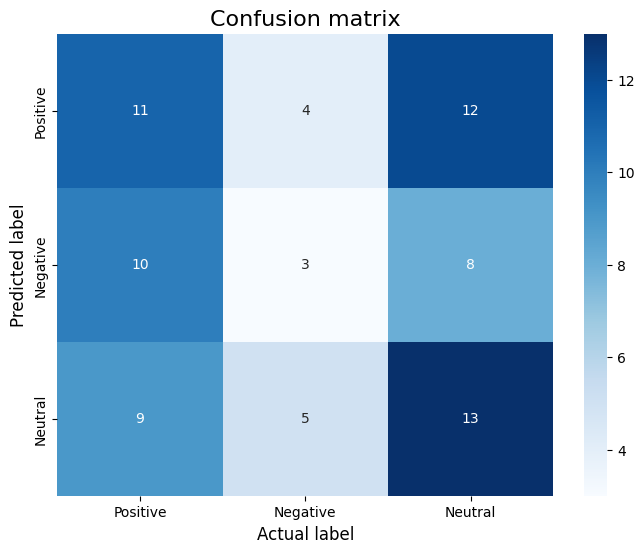

In [46]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Positive', 'Negative', 'Neutral']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test,y_predict)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(sentiment_model, x_test, y_test)

# **Testing the Model**

In [47]:
import pickle

filename = 'trained_model.sav'
pickle.dump(sentiment_model, open(filename, 'wb'))

In [48]:
loaded_model = pickle.load(open('/content/drive/MyDrive/[Internship] AI Technical Task/trained_model.sav','rb'))

In [49]:
def load_models():
    # Load the LR Model.
    file = open('/content/drive/MyDrive/[Internship] AI Technical Task/trained_model.sav', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return LRmodel

In [50]:

df['model_output'] = sentiment_model.predict(X)
output_sentiment_test = df[['expected_sentiment', 'text', 'model_output',]]
output_sentiment_test.head()

,expected_sentiment,text,model_output
0,positive,Stellargirl love kind DX cool fantasy right,positive
1,positive,Read kind love lee child good read,positive
2,positive,Ok first ass kind fuck rock,positive
3,positive,Kenburbari love kind live mine month never loo...,positive
4,positive,Mikefish fair enough kind think perfect,positive


In [51]:
for index, row in output_sentiment_test['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  comp = score['compound']
  output_sentiment_test.loc[index, 'compound'] = comp

  output_sentiment_test.head(3)



<ipython-input-51-2d7e9313a933>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in output_sentiment_test['text'].iteritems():


In [52]:
output_sentiment_test.head()

,expected_sentiment,text,model_output,compound
0,positive,Stellargirl love kind DX cool fantasy right,positive,0.6330
1,positive,Read kind love lee child good read,positive,0.8885
2,positive,Ok first ass kind fuck rock,positive,-0.3400
3,positive,Kenburbari love kind live mine month never loo...,positive,0.8720
4,positive,Mikefish fair enough kind think perfect,positive,0.8555


In [53]:
output_sentiment_test.to_csv('output_sentiment_test.csv',)